<a href="https://colab.research.google.com/github/KesteHarshada87/MachineLearning/blob/main/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # We only need the features, not the labels
df = pd.DataFrame(X, columns=iris.feature_names)

# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it (standardize the features)
X_scaled = scaler.fit_transform(X)

# Convert the scaled data to a DataFrame for easier inspection
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)

# Display the first few rows of the scaled dataset
print(df_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


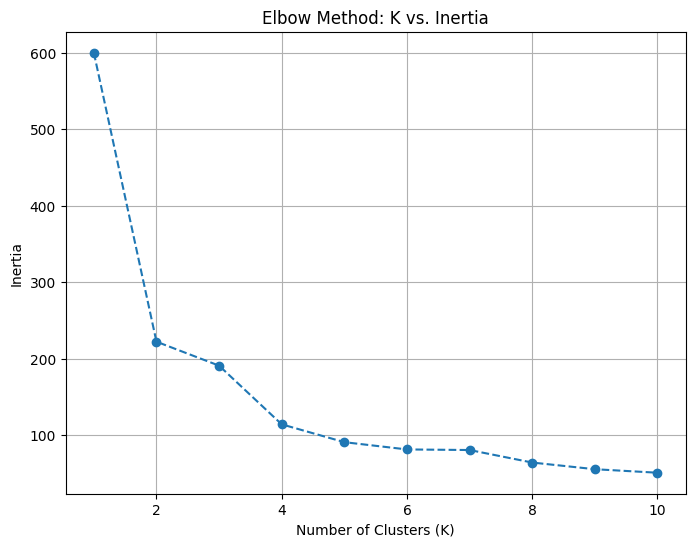

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate inertia for different values of K
inertia = []
K_range = range(1, 11)  # Check for K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot K vs. Inertia
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method: K vs. Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Train KMeans with the optimal K (from Elbow Method we found ~3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Access the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Display results
print("Cluster Labels (first 20):")
print(cluster_labels[:20])  # show first 20 labels

print("\nCluster Centroids:")
print(cluster_centroids)


Cluster Labels (first 20):
[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1]

Cluster Centroids:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


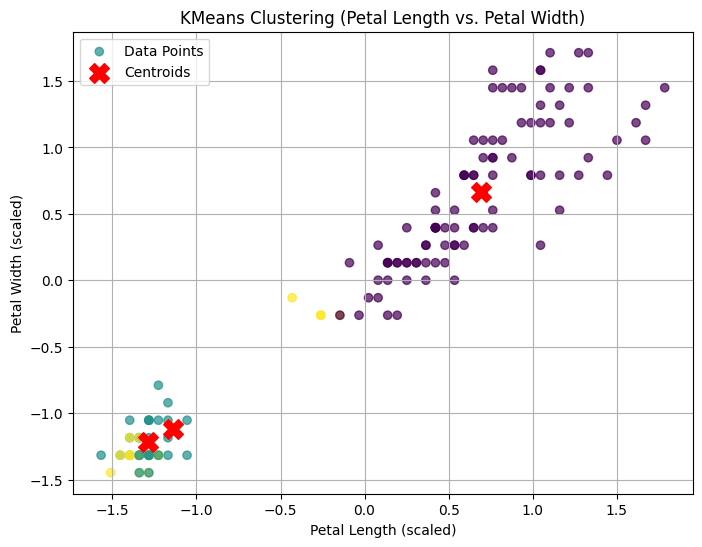

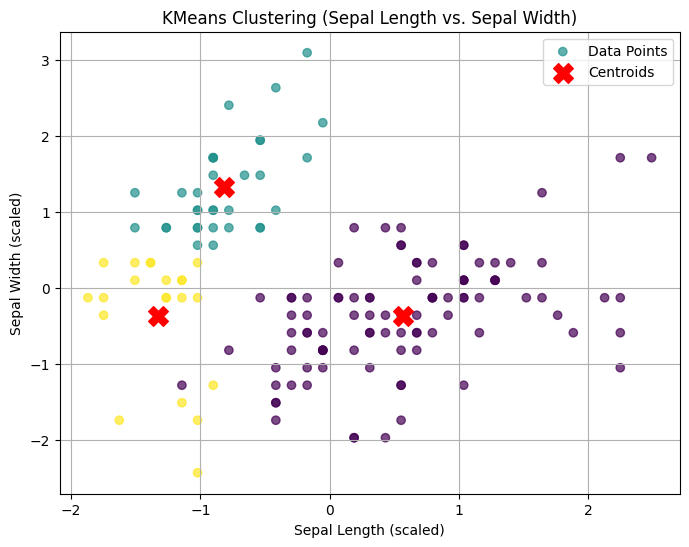

In [ ]:
import matplotlib.pyplot as plt

# === Plot 1: Petal Length vs. Petal Width ===
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 2], X_scaled[:, 3],
            c=cluster_labels, cmap='viridis', marker='o', alpha=0.7, label="Data Points")

plt.scatter(cluster_centroids[:, 2], cluster_centroids[:, 3],
            c='red', marker='X', s=200, label='Centroids')

plt.title("KMeans Clustering (Petal Length vs. Petal Width)")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.legend()
plt.grid(True)
plt.show()


# === Plot 2: Sepal Length vs. Sepal Width ===
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c=cluster_labels, cmap='viridis', marker='o', alpha=0.7, label="Data Points")

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title("KMeans Clustering (Sepal Length vs. Sepal Width)")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.legend()
plt.grid(True)
plt.show()
